<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание проекта:
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
Нужно построить модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Нужно проверить F1-меру на тестовой выборке самостоятельно.
Дополнительно измерить AUC-ROC, сравнить её значение с F1-мерой.**

In [18]:
!pip install scikit-learn==1.3.0

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
import random
import numpy as np
import seaborn as sns
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.preprocessing import OneHotEncoder

# константа для random_state
RANDOM_STATE = 42

In [20]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv("C:\\DS\\YP\\S10\\Churn.csv")

In [21]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**Описание данных**
RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Exited — факт ухода клиента - целевой признак 


## Подготовка данных

Вывод информации о датафрейме

In [22]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Проверка на пропуски

In [23]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Подсчитаем процент пропущенных значений от общего числа

In [24]:
((df['Tenure'].isna().sum() / len(df)).round(4)) * 100

9.09

Процент довольно значительный. Просто удалить пропуски не получится.

Визуализируем данные.

<AxesSubplot:>

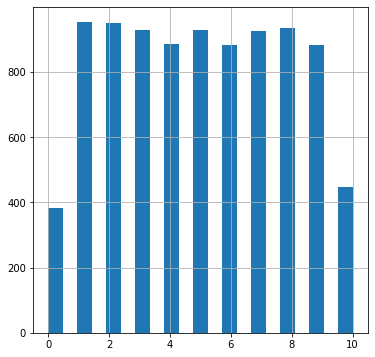

In [25]:
df['Tenure'].hist(figsize=(6,6), bins = 21)

Интересное распределение, клиентов с длительностью пользования услугами банка меньше года и больше 9 немногим в два раза меньше чем среднее других значений. Нет возможности выяснить причину. Предположим что на создания датафреёма, год незавершён и поэтому клиетов со стажем меньше 1го года на так много. Клиенты, у которых в данной таблице стаж больше 9ти лет, либо перестали пользоваться услугами, что меловероятно, учитываю резкое сокращение на половину, либо их изначальное было меньше.

Причина пропусков неизвестна, Допустим что они имеют случайное значение. Замена пропусков на медиану или среднее значение может повлилять на итоговый результат. Считаю что стоит заменить пропуски на случайное значение от 0 до 10.

In [26]:
vc_population = df['Tenure'].value_counts(normalize=True).sort_index().index.tolist()
vc_weight = df['Tenure'].value_counts(normalize=True).sort_index().tolist()
df['Tenure'] = df['Tenure'].apply(lambda x: int(random.choices(vc_population, weights=vc_weight)[0]) if pd.isna(x) else x)

In [27]:
df['Tenure'].isna().sum()

0

Проверим успешность замены

In [28]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

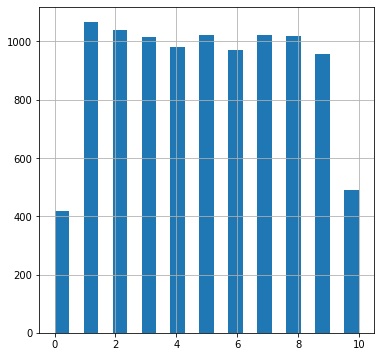

In [29]:
df['Tenure'].value_counts()
df['Tenure'].hist(figsize=(6,6), bins = 21);

Построим график для всех значений

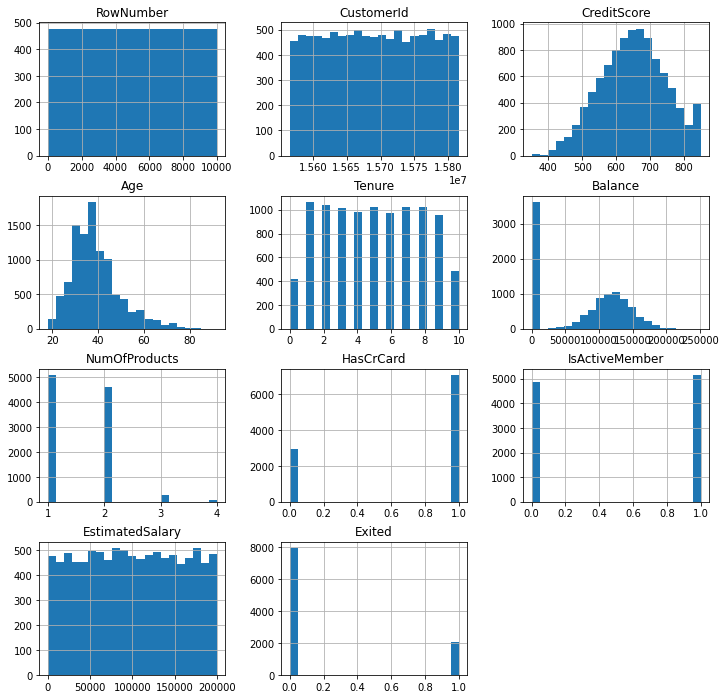

In [30]:
df.hist(layout=(4, 3), figsize=(12,12), bins = 21);

Графики выглядят нормальными

Построим график корреляции данных

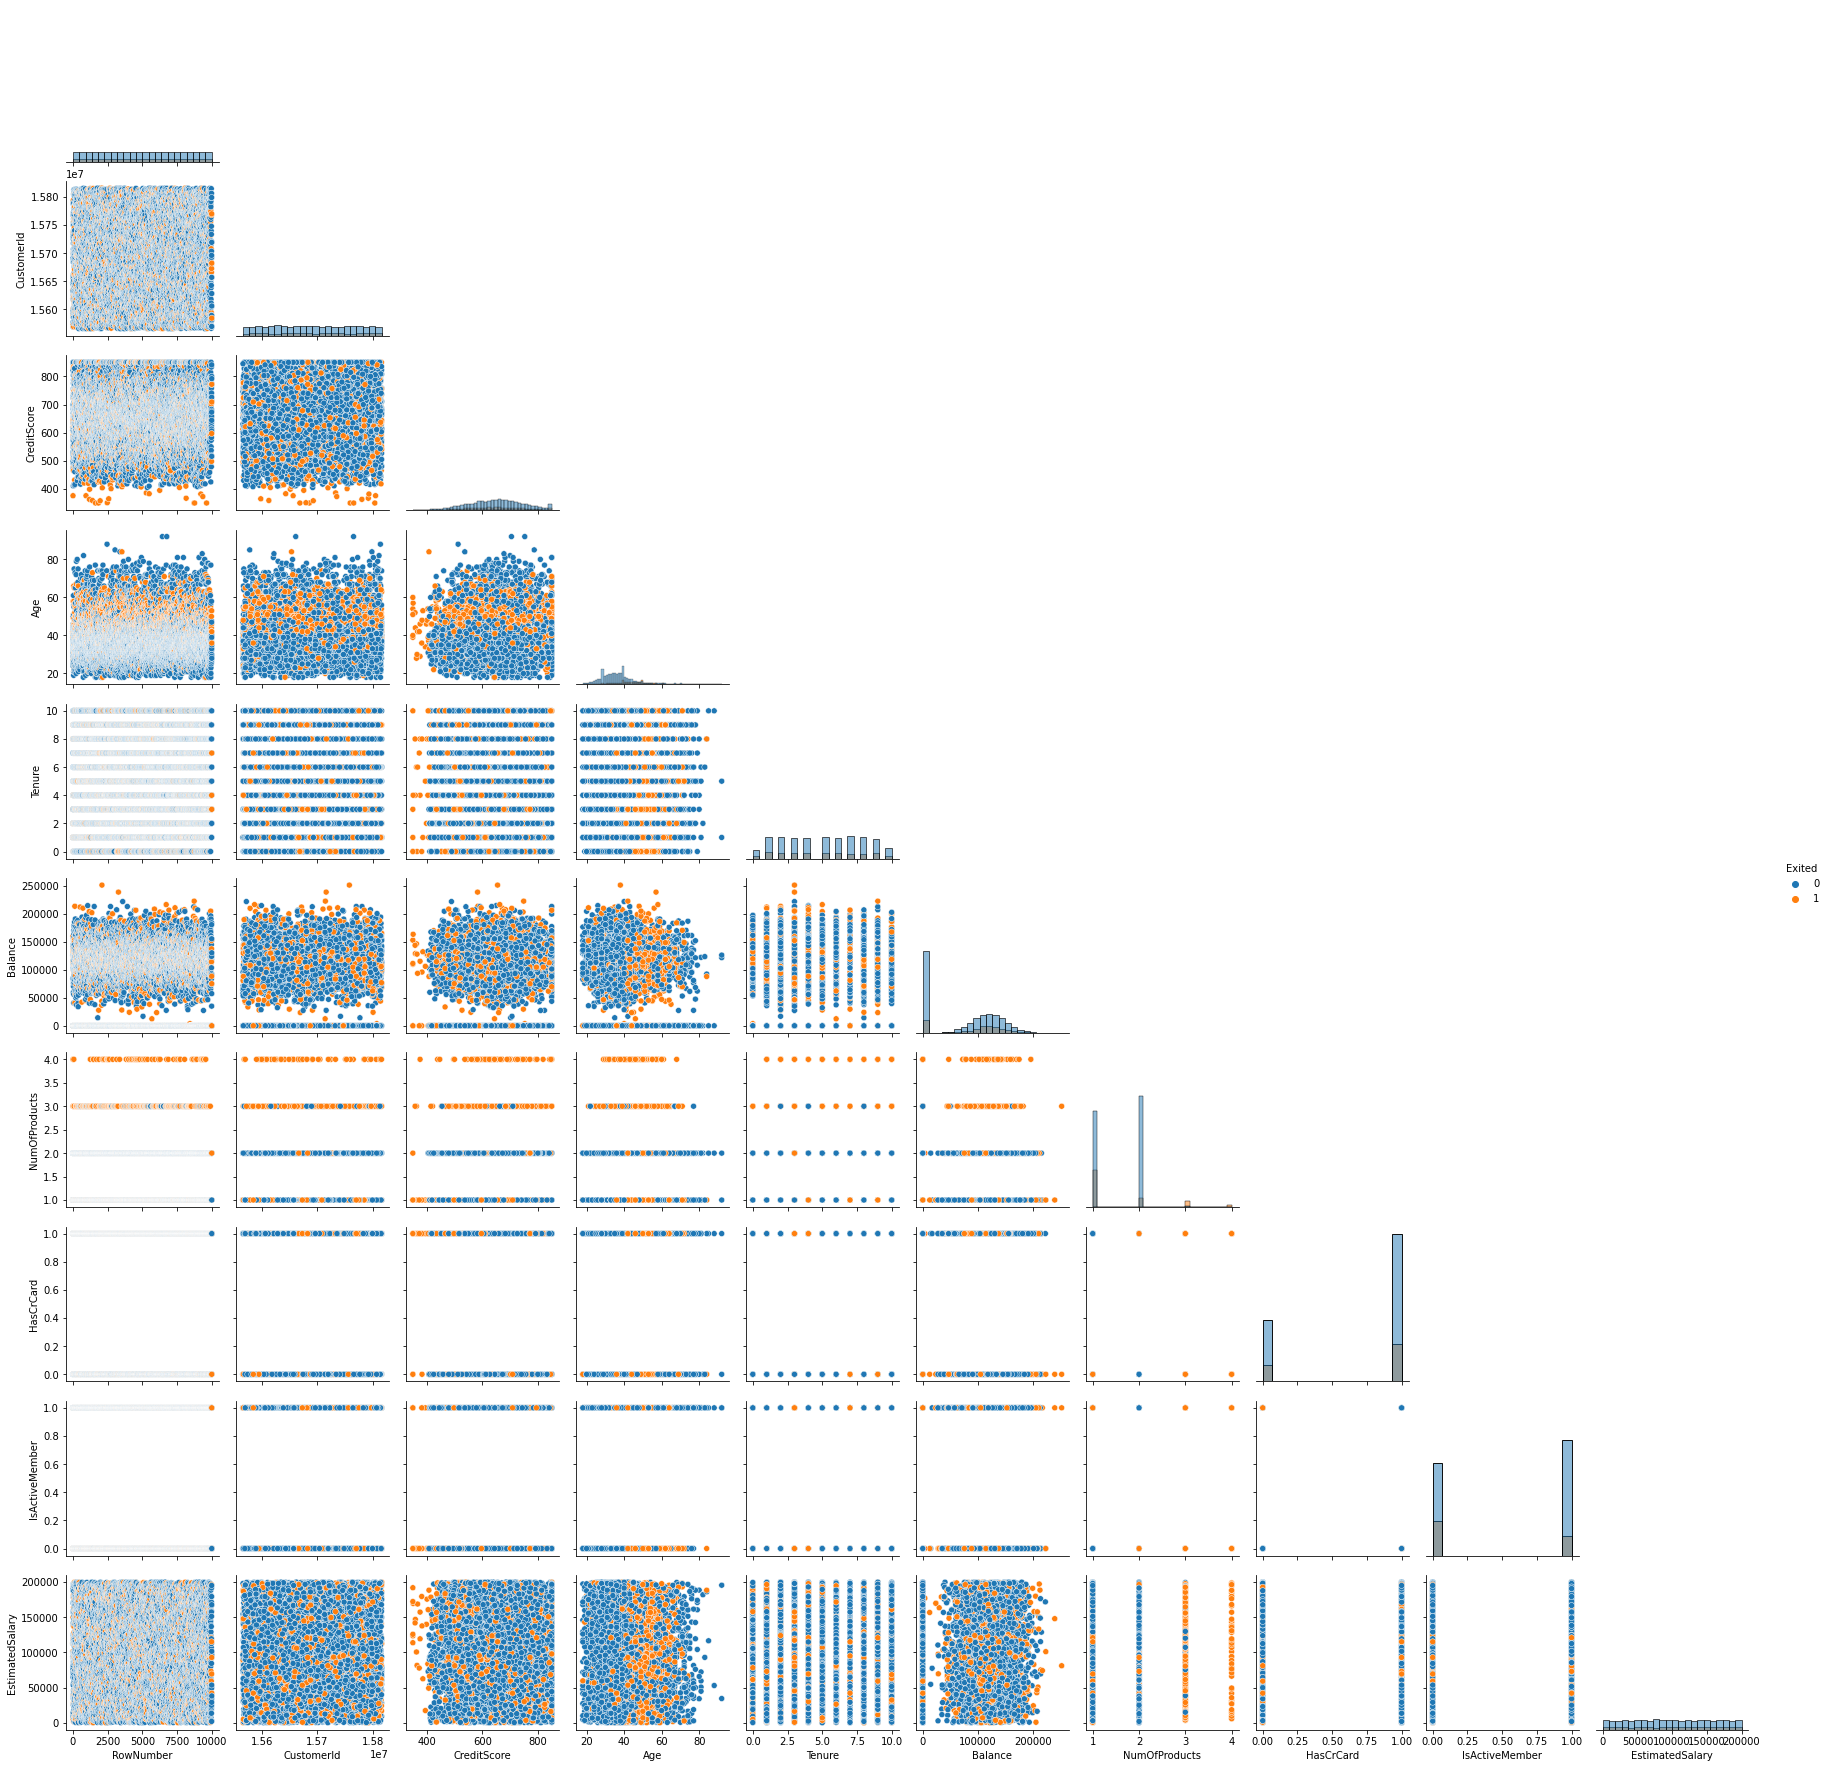

In [31]:
sns.pairplot(df, hue='Exited', diag_kind='hist', corner=True);

Мультиколленаиарности ны выявлено, что хорошо для эффектиности модели

Проверим на наличие дубликатов

In [32]:
# проверка на явные дубликаты
df.duplicated().sum()

0

In [33]:
# проверка на неявные дубликаты по уникальному номеру клиента
df.CustomerId.value_counts()

15695872    1
15801062    1
15682268    1
15647453    1
15684319    1
           ..
15629677    1
15773039    1
15766896    1
15719793    1
15812607    1
Name: CustomerId, Length: 10000, dtype: int64

Перед проверкой модели необходимо удалить лишние признаки.

In [34]:
# сохраним ихсодный датасет
df_old = df.copy()
#удалим лишние признаки
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Считаю данные подготовленными. Далее приступим к исследованию задачи

## Исследование задачи

В датафрейме есть нечисловые категориальные данные, с которыми модель работать не сможет. Переведём их в числовые методом One-Hot Encoding, т.к. этот метод работат с любмыми моделями, в том числе с решающим деревом и случайным лесом.

Проведём тестовое обучение

In [35]:
# Разобьём датасет на выборки
features = df.drop('Exited', axis=1)
target = df['Exited']

features_train, features_valid, target_train, target_valid = \
train_test_split(features, target, test_size=0.5, random_state=RANDOM_STATE, stratify = target)

features_test, features_valid, target_test, target_valid = \
train_test_split(features_valid, target_valid, test_size=0.5, random_state=RANDOM_STATE, stratify = target_valid)


print(features_train.shape, target_train.shape)
print()
print(features_valid.shape, target_valid.shape)
print()
print(features_test.shape, target_test.shape)

(5000, 10) (5000,)

(2500, 10) (2500,)

(2500, 10) (2500,)


In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [37]:
#категориальные признаки для OHE
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
#численные признаки
num_features = features_train.select_dtypes(exclude='object').columns.to_list()

print(ohe_features)
print(num_features)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [38]:
# drop='first' удаляет первый признак из закодированных:
# таким образом обходим dummy-ловушку
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[ohe_features])

# добавляем закодированные признаки в X_train_ohe
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features])

# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(ohe_features, axis=1)

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
features_train[num_features] = scaler.fit_transform(features_train[num_features])

# смотрим на результат
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8851,1.363179,0.308586,0.714447,0.812194,-0.924462,0.648425,-1.033356,-1.045313,1.0,0.0,1.0
8274,1.010749,-0.752710,-1.360223,0.380554,-0.924462,0.648425,-1.033356,1.736940,1.0,0.0,0.0
9542,-0.067273,-0.173821,1.406004,-1.218719,0.787505,0.648425,0.967721,-0.057320,0.0,1.0,1.0
8332,-0.056907,0.983957,-0.322888,1.353631,-0.924462,-1.542199,0.967721,-0.197822,1.0,0.0,1.0
3335,-0.720305,-0.752710,0.368669,-1.218719,0.787505,0.648425,-1.033356,1.547098,0.0,1.0,0.0


In [39]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем валидную
features_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_valid[ohe_features])

features_valid = features_valid.drop(ohe_features, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем валидную
features_valid[num_features] = scaler.transform(
    features_valid[num_features]
)

# смотрим на результат
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8500,0.098577,-0.173821,-1.014444,0.344683,-0.924462,0.648425,-1.033356,-1.333935,0.0,0.0,1.0
7065,-1.280047,1.369883,1.060225,-1.218719,-0.924462,0.648425,0.967721,-0.837960,0.0,1.0,1.0
6023,1.404641,-0.559747,-1.706001,0.115151,-0.924462,-1.542199,0.967721,0.964442,0.0,0.0,0.0
7850,-1.684305,-0.270303,-1.706001,-1.218719,0.787505,0.648425,-1.033356,0.644807,0.0,0.0,0.0
7664,-0.502627,-0.366784,1.060225,-1.218719,-0.924462,0.648425,0.967721,-1.347766,0.0,0.0,1.0


In [24]:
# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
features_test[num_features] = scaler.transform(
    features_test[num_features]
)

# смотрим на результат
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2269,-0.471531,-0.559747,-0.333133,-1.218719,0.787505,-1.542199,0.967721,-0.279694,0.0,0.0,0.0
4689,1.249157,0.598031,-1.714568,1.027403,-0.924462,-1.542199,-1.033356,1.243573,0.0,1.0,1.0
1617,-0.969079,0.115623,-0.333133,-1.218719,0.787505,-1.542199,0.967721,0.099584,0.0,1.0,0.0
3987,-0.181294,-0.173821,-0.333133,1.055045,-0.924462,0.648425,0.967721,0.438088,0.0,0.0,1.0
6426,0.958921,0.598031,0.702943,1.308626,-0.924462,0.648425,-1.033356,0.448460,0.0,1.0,1.0


Проверим модель на дисбаланс.

0    0.7963
1    0.2037
Name: Exited, dtype: float64

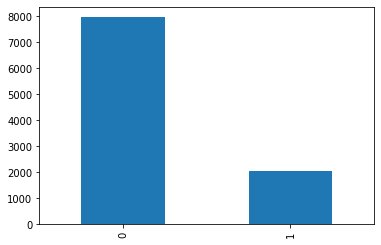

In [25]:
target.value_counts().plot(kind='bar');
target.value_counts(normalize=True)

Выборка не сбалансирована. Положительные ответы составляют только 20% от общего числа показателей.

До устранения дисбаланса, обучим модели.

In [29]:
# обучим модель решающее дерево
best_depth = 0
best_result = 0
for depth in range(1, 22):
    model_tree = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = depth) # обучение модели с заданной глубиной
    model_tree.fit(features_train, target_train) # обучение модели на тренировочной выборке
    predicted_valid = model_tree.predict(features_valid) # подсчёт качества модели на валидационной выборке
    result = f1_score(target_valid, predicted_valid)
    
    if result > best_result:
        best_result = result
        best_depth = depth 
        

        
print('Лучшая точность:', best_result, )
print('Лучшая глубина:', best_depth)

Лучшая точность: 0.5691056910569106
Лучшая глубина: 6


AUC-ROC 0.8271810573908719

F1:  0.5691056910569106


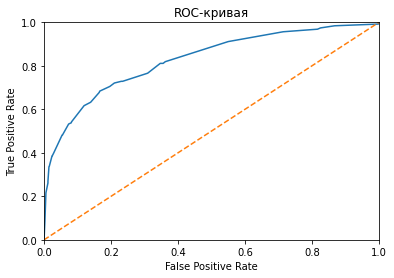

In [30]:
# обучение модели с лучшими параметрами
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = best_depth) # обучение модели с заданной глубиной
model.fit(features_train, target_train) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid) # подсчёт качества модели на валидационной выборке



# вычислиение вероятности объектов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_valid,  probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
f1 = f1_score(target_valid, predicted_valid)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)

In [31]:
# создадим таблицу результатов моделей для удобства сравнения
table = [['дерево до устранения дисбаланса', auc_roc, f1]]
model_table = pd.DataFrame(table, columns = ['модель', 'AUC-ROC', 'F1'])
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57


Уровень значений явно недостаточен

In [32]:
# обучим модель случайный лес

best_result = 0
best_est = None
for est in range(1, 100):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=RANDOM_STATE, 
                                       n_estimators=est, max_depth = depth) # обучение модели с заданным числом деревьев
        model.fit(features_train, target_train) # обучение модели на тренировочной выборке
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) # подсчёт качества модели на валидационной выборке
        if result > best_result:
            best_result = result # сохранение наилучшего значений метрики accurcy на валидационных данных
            best_est = est
            best_depth = depth
        
print("F1 наилучшей модели на валидационной выборке:", best_result, "с количеством деревьев:", best_est,
     "и глубиной деревьев:", best_depth)

F1 наилучшей модели на валидационной выборке: 0.5818610129564193 с количеством деревьев: 22 и глубиной деревьев: 12


AUC-ROC 0.8329141253519029

F1:  0.5818610129564193


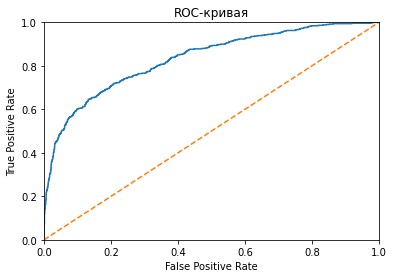

In [33]:
# обучение модели с лучшими параметами
model = RandomForestClassifier(random_state=RANDOM_STATE, 
                               n_estimators=best_est, max_depth = best_depth) # обучение модели с заданным числом деревьев
model.fit(features_train, target_train) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid)



# вычислиение вероятности объектов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_valid,  probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
f1 = f1_score(target_valid, predicted_valid)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)

Для леса AUC-ROC выше, а F1 ниже

In [34]:
#добавление строки в таблицу
model_table.loc[len(model_table.index)] = ['лес до устранения дисбаланса', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58


Выборка не сбалансированна
Проведём тестовое обучение модели и проверим точность с точность константной модели.

In [35]:
# проверим точность модели
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

# создадам и проверим константную модель
target_pred_constant = pd.Series([0] * len(target_valid))
print('Константная модель:', accuracy_score(target_valid, target_pred_constant)) 

# метрка F1
print('F1:', f1_score(target_valid, predicted_valid))

Accuracy: 0.858
Константная модель: 0.7964
F1: 0.5818610129564193


Разницы между константно и не константной моделями почти нет. F1 = 0.52, что недостаточно.

Выполнили преобрзование категориальнх признаков в численные методом прямого кодирования. Выявили дисбаланс целевого признка. 
На следующем этапи устраним дисбаланс.

## Борьба с дисбалансом

Чтобы преодолеть дисбаланс придадим более редкому параметру больший вес.

In [36]:
# увеличение веса с помощью параметра class_weight='balanced'
best_depth = 0
best_result = 0
for depth in range(1, 22):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, 
                                   class_weight='balanced', max_depth = depth) # обучение модели с заданной глубиной
    model.fit(features_train, target_train) # обучение модели на тренировочной выборке
    predicted_valid = model.predict(features_valid) # подсчёт качества модели на валидационной выборке
    result = f1_score(target_valid, predicted_valid)
    
    if result > best_result:
        best_result = result
        best_depth = depth 
        

        
print('Лучшая точность:', best_result, )
print('Лучшая глубина:', best_depth)



Лучшая точность: 0.577391304347826
Лучшая глубина: 5


AUC-ROC 0.6684446413576222

F1:  0.4693486590038314


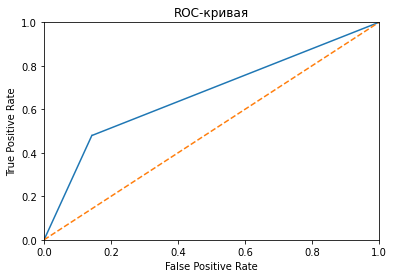

In [37]:
# обучение модели с лучшими параметрами
model = DecisionTreeClassifier(random_state=RANDOM_STATE, 
                               class_weight='balanced', max_depth = depth) # обучение модели с заданной глубиной
model.fit(features_train, target_train) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid) # подсчёт качества модели на валидационной выборке

# вычислиение вероятности объектов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_valid,  probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
f1 = f1_score(target_valid, predicted_valid)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)


AUC-ROC почти не изменился F1 осталось прежней

In [38]:
#добавление строки в таблицу
model_table.loc[len(model_table.index)] = ['дерево с применением "balanced"', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58
2,"дерево с применением ""balanced""",0.67,0.47


In [39]:
# увеличение веса с помощью параметра class_weight='balanced'
best_est = None
for est in range(1, 100):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced',
                                       n_estimators=est, max_depth = depth) # обучение модели с заданным числом деревьев
        model.fit(features_train, target_train) # обучение модели на тренировочной выборке
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) # подсчёт качества модели на валидационной выборке
        if result > best_result:
            best_result = result # сохранение наилучшего значений метрики accurcy на валидационных данных
            best_est = est
            best_depth = depth
        
print("F1 наилучшей модели на валидационной выборке:", best_result, "с количеством деревьев:", best_est,
     "и глубиной деревьев:", best_depth)




F1 наилучшей модели на валидационной выборке: 0.6235186873290793 с количеством деревьев: 40 и глубиной деревьев: 8


AUC-ROC 0.8504202111860939

F1:  0.6235186873290793


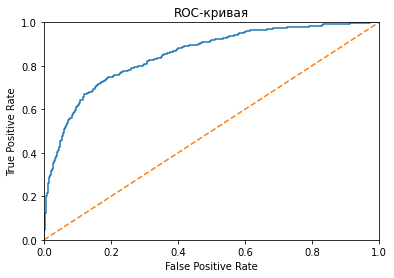

In [40]:
# обучение модели с лучшими параметрами
model = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced', 
                               n_estimators=best_est, max_depth = best_depth) # обучение модели с заданным числом деревьев
model.fit(features_train, target_train) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid)

# вычислиение вероятности объектов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_valid,  probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
f1 = f1_score(target_valid, predicted_valid)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)


AUC-ROC почти не изменился F1 осталось прежней

In [41]:
# добавление строки в таблицу
model_table.loc[len(model_table.index)] = ['лес с применением "balanced"', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58
2,"дерево с применением ""balanced""",0.67,0.47
3,"лес с применением ""balanced""",0.85,0.62


Показатели модели дерево упали, а модели лес, наоборот подрасли.

In [42]:
# функция для увеличения положительных объектов
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

# увеличим в 4 раза для баланса с отрицальными объектами
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [43]:
# обучение модели на увеличенной выборке

best_depth = 0
best_result = 0
for depth in range(1, 22):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = depth) # обучение модели с заданной глубиной
    model.fit(features_upsampled, target_upsampled) # обучение модели на тренировочной выборке
    predicted_valid = model.predict(features_valid) # подсчёт качества модели на валидационной выборке
    result = f1_score(target_valid, predicted_valid)
    
    if result > best_result:
        best_result = result
        best_depth = depth 
        

        
print('Лучшая точность:', best_result, )
print('Лучшая глубина:', best_depth)

Лучшая точность: 0.577391304347826
Лучшая глубина: 5


AUC-ROC 0.8263467529225326

F1:  0.577391304347826


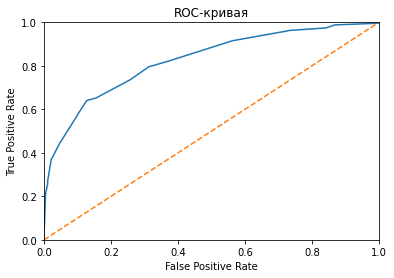

In [44]:
# обучение модели с лучшими параметрами на увеличивающей выборке
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = best_depth) # обучение модели с заданной глубиной
model.fit(features_upsampled, target_upsampled) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid)


# вычислиение вероятности объектов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_valid,  probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
f1 = f1_score(target_valid, predicted_valid)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)

Отличия в увеличения точности. Теперь обучим случайный лес.

In [45]:
model_table.loc[len(model_table.index)] = ['дерево с увеличением выборки', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58
2,"дерево с применением ""balanced""",0.67,0.47
3,"лес с применением ""balanced""",0.85,0.62
4,дерево с увеличением выборки,0.83,0.58


In [46]:
# обучим модель cлучайный лес на увеличенной выборке
best_result = 0
best_est = None
for est in range(1, 100):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=RANDOM_STATE, 
                                       n_estimators=est, max_depth = depth) # обучение модели с заданным числом деревьев
        model.fit(features_upsampled, target_upsampled) # обучение модели на тренировочной выборке
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) # подсчёт качества модели на валидационной выборке
        if result > best_result:
            best_result = result # сохранение наилучшего значений метрики accurcy на валидационных данных
            best_est = est
            best_depth = depth
        
print("F1 наилучшей модели на валидационной выборке:", best_result, "с количеством деревьев:", best_est,
     "и глубиной деревьев:", best_depth)



F1 наилучшей модели на валидационной выборке: 0.6251180358829084 с количеством деревьев: 62 и глубиной деревьев: 11


AUC-ROC 0.8465471833466709

F1:  0.6251180358829084


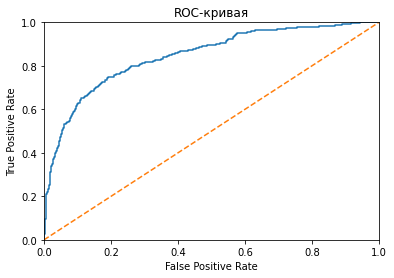

In [47]:
# обучение модели с лучшими параметрами на увеличивающей выборке
model = RandomForestClassifier(random_state=RANDOM_STATE, 
                               n_estimators=best_est, max_depth = best_depth) # обучение модели с заданным числом деревьев
model.fit(features_upsampled, target_upsampled) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid) 

# вычислиение вероятности объектов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_valid,  probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
f1 = f1_score(target_valid, predicted_valid)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)

In [48]:
model_table.loc[len(model_table.index)] = ['лес с увеличением выборки', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58
2,"дерево с применением ""balanced""",0.67,0.47
3,"лес с применением ""balanced""",0.85,0.62
4,дерево с увеличением выборки,0.83,0.58
5,лес с увеличением выборки,0.85,0.63


F1 у модели лес почти не изменилось. Далее попробуем уменьшть "отрицательные параметры"

In [49]:
# функция для уменьшения отрицательных объектов
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

# уменьшим в 4 раза для баланса с положительными объекатми
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)



In [50]:
# обучим модель ну уменьшенной выборке
# обучим модель решающее дерево
best_depth = 0
best_result = 0
for depth in range(1, 22):
    model= DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = depth) # обучение модели с заданной глубиной
    model.fit(features_downsampled, target_downsampled) # обучение модели на тренировочной выборке
    predicted_valid = model.predict(features_valid) # подсчёт качества модели на валидационной выборке
    result = f1_score(target_valid, predicted_valid)
    
    if result > best_result:
        best_result = result
        best_depth = depth 
        

        
print('Лучшая точность:', best_result, )
print('Лучшая глубина:', best_depth)





Лучшая точность: 0.5778421433743665
Лучшая глубина: 5


AUC-ROC 0.8350203617654692

F1:  0.5778421433743665


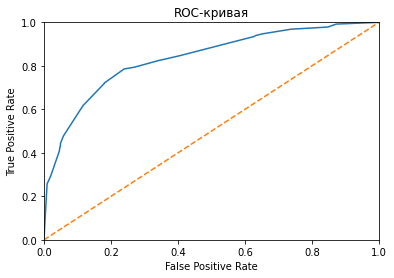

In [51]:
# обучение модели с лучшими параметрами
model= DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = best_depth) # обучение модели с заданной глубиной
model.fit(features_downsampled, target_downsampled) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid) # подсчёт качества модели на валидационной выборке



# вычислиение вероятности объектов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_valid,  probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
f1 = f1_score(target_valid, predicted_valid)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)

In [52]:
model_table.loc[len(model_table.index)] = ['дерево с уменьшением выборки', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58
2,"дерево с применением ""balanced""",0.67,0.47
3,"лес с применением ""balanced""",0.85,0.62
4,дерево с увеличением выборки,0.83,0.58
5,лес с увеличением выборки,0.85,0.63
6,дерево с уменьшением выборки,0.84,0.58


Результаты те же, что и при увеличении выборки. Далее обучим "случайный лес".

In [53]:
# обучим модель случайный лес на понмажющей выборке

best_result = 0
best_est = None
for est in range(1, 100):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=RANDOM_STATE, 
                                       n_estimators=est, max_depth = depth) # обучение модели с заданным числом деревьев
        model.fit(features_downsampled, target_downsampled) # обучение модели на тренировочной выборке
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) # подсчёт качества модели на валидационной выборке
        if result > best_result:
            best_result = result # сохранение наилучшего значений метрики accurcy на валидационных данных
            best_est = est
            best_depth = depth
        
print("F1 наилучшей модели на валидационной выборке:", best_result, "с количеством деревьев:", best_est,
     "и глубиной деревьев:", best_depth)



F1 наилучшей модели на валидационной выборке: 0.5957767722473605 с количеством деревьев: 25 и глубиной деревьев: 7


AUC-ROC 0.8474441469915208

F1:  0.5172413793103448


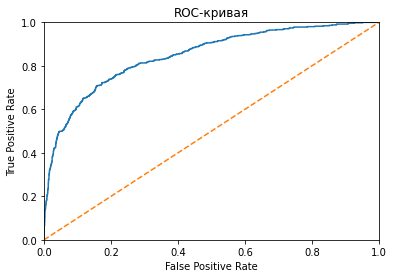

In [54]:
# обучим модель случайный лес с лучишми параметрами
model = RandomForestClassifier(random_state=RANDOM_STATE, 
                               n_estimators=best_est, max_depth = best_depth) # обучение модели с заданным числом деревьев
model.fit(features_train, target_train) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid)

# вычислиение вероятности объектов
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_valid,  probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
f1 = f1_score(target_valid, predicted_valid)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)

In [55]:
model_table.loc[len(model_table.index)] = ['лес с уменьшением выборки', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58
2,"дерево с применением ""balanced""",0.67,0.47
3,"лес с применением ""balanced""",0.85,0.62
4,дерево с увеличением выборки,0.83,0.58
5,лес с увеличением выборки,0.85,0.63
6,дерево с уменьшением выборки,0.84,0.58
7,лес с уменьшением выборки,0.85,0.52


"случайный лес" с уменьшеним выборки показал резульатты сильно хужк, чем с увеличением или с балансом

## Тестирование модели

Найдём оптиматльную модель. Сначала найдём оптимальную глубину дерева, потом оптимальное количество деревьев в случайном лесе.

Далее натренируем модель случайный лес с количеством деревьев до 100 и лучшей максимальной глубиной из предыдущего исследования.

Проведем тестирование на тестовой модели

AUC-ROC 0.8402570901078428

F1:  0.5869380831212893


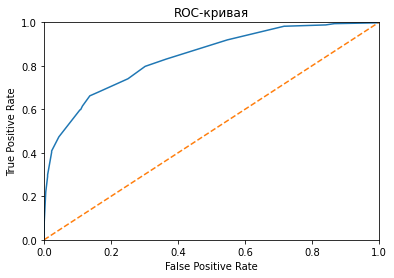

In [56]:
# обучим модель решающее дерево
model_test = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=5)
model_test.fit(features_upsampled, target_upsampled)
predicted_test = model_test.predict(features_test)

# вычислиение вероятности объектов
probabilities_test = model_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_test,  probabilities_one_test)

plt.figure() 
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_test, probabilities_one_test)
f1 = f1_score(target_test, predicted_test)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)


In [57]:
model_table.loc[len(model_table.index)] = ['обученное дерево на тестовой выборке', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58
2,"дерево с применением ""balanced""",0.67,0.47
3,"лес с применением ""balanced""",0.85,0.62
4,дерево с увеличением выборки,0.83,0.58
5,лес с увеличением выборки,0.85,0.63
6,дерево с уменьшением выборки,0.84,0.58
7,лес с уменьшением выборки,0.85,0.52
8,обученное дерево на тестовой выборке,0.84,0.59


AUC-ROC 0.8708895333519501

F1:  0.5869380831212893


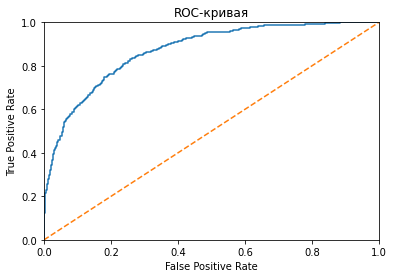

In [58]:
# обучим случайный лес
model_test = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=best_est, max_depth = best_depth) # обучение модели с заданным числом деревьев
model_test.fit(features_upsampled, target_upsampled)
predicted_test = model_test.predict(features_test)

# вычислиение вероятности объектов
probabilities_test = model_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# строительство кривой
fpr, tpr, thresholds = roc_curve(target_test,  probabilities_one_test)

plt.figure() 
plt.plot(fpr, tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')


# вычисление отличия от случайной прямой
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC', auc_roc)
print()
print('F1: ', f1)

In [59]:
model_table.loc[len(model_table.index)] = ['обученный лес на тестовой выборке', auc_roc, f1]
model_table.round(2)

,модель,AUC-ROC,F1
0,дерево до устранения дисбаланса,0.83,0.57
1,лес до устранения дисбаланса,0.83,0.58
2,"дерево с применением ""balanced""",0.67,0.47
3,"лес с применением ""balanced""",0.85,0.62
4,дерево с увеличением выборки,0.83,0.58
5,лес с увеличением выборки,0.85,0.63
6,дерево с уменьшением выборки,0.84,0.58
7,лес с уменьшением выборки,0.85,0.52
8,обученное дерево на тестовой выборке,0.84,0.59
9,обученный лес на тестовой выборке,0.87,0.59


**Итоговый вывод**

В этом проекте подготовили данные. В столбце «Tenure»,  пропуски заполнили, случайными значениями пропорционально встречаемости в столбце. 
Разделили выборку на три части, тренировочную, валидную и тестовую.

При кодировании использовали метод OneHotEncoder. Признаки в таблице были отмасштабированы.
Устранили дисбаланс. Использовали три варианта.  1 – с помощью параметра class_weight='balanced'  в моделях. 2 – увеличив положительной признак 3 – уменьшив отрицательный.
Обучили модели на выборке с устранённым дисбалансом. Лучше всего себя показала модель случайный лес с увеличенной выборкой. 
Использовали лучшую модель и взвешивание классов на тестовой выборке удалось добиться показателя F1 величиной 0,61, что считается приемлемым.

В итоге у нас есть есть модель для прогнозирования лоялности клиента.

Нам удалось избавиться от дисбаланса выбокри и добиться метрики F1 выше 0,59